# 유튜브 랭킹 데이터 수집하기

In [6]:
# 라이브러리 추가하기
from selenium import webdriver
from bs4 import BeautifulSoup
import time
import pandas as pd

In [7]:
# webdriver로 사파리 브라우저 실행하기
browser = webdriver.Safari()
url = "https://youtube-rank.com/board/bbs/board.php?bo_table=youtube"
browser.get(url)

In [8]:
# 페이지 정보 가져오기
html = browser.page_source
soup = BeautifulSoup(html, 'html.parser')

In [9]:
# BeautifulSoup으로 tr 태그 추출하기
channel_list = soup.select('form > table > tbody > tr')

len(channel_list)

100

In [10]:
# 채널태그출력 및 태그구조 확인하기
channel = channel_list[0]

print(channel)

<tr class="aos-init aos-animate" data-aos="fade-up" data-aos-duration="800">
<td class="rank">
                        1                    </td>
<td class="td_img">
<div class="info_img"><a href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=3203"><img class="lazyload" data-src="https://yt3.ggpht.com/ytc/AKedOLSWxQF3kaqYMX1MWVVzNkNZaM-3EU551f2orOqykA=s88-c-k-c0x00ffffff-no-rj-mo" height="88" src="https://yt3.ggpht.com/ytc/AKedOLSWxQF3kaqYMX1MWVVzNkNZaM-3EU551f2orOqykA=s88-c-k-c0x00ffffff-no-rj-mo" width="88"/></a></div>
<p class="info_rank">1</p>
</td>
<td class="subject">
<h1>
<p <a="" class="category" href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;sca=%EC%9D%8C%EC%95%85%2F%EB%8C%84%EC%8A%A4%2F%EA%B0%80%EC%88%98">[음악/댄스/가수]
                                
                                </p>
<a href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=3203">
								
								BLACKPINK							</a>
<span>
<i class="

In [11]:
# 카테고리 정보 추출하기
category = channel.select('p.category')[0].text.strip()    #strip() 공백 제거

category

'[음악/댄스/가수]'

In [12]:
# 채널명 찾아오기

title = channel.select('h1 > a')[0].text.strip()

title

'BLACKPINK'

In [13]:
# 구독자 수, View 수, 동영상 수 추출하기

subscriber = channel.select('td.subscriber_cnt')[0].text
view = channel.select('td.view_cnt')[0].text
video = channel.select('td.video_cnt')[0].text

print(subscriber)
print(view)
print(video)

7170만
222억0087만
395개


In [14]:
# 반복문로 채널 정보 추출하기

channel_list = soup.select('tbody > tr')
for channel in channel_list :
    title = channel.select('h1 > a')[0].text.strip()
    category = channel.select('p.category')[0].text.strip()
    subscriber = channel.select('td.subscriber_cnt')[0].text
    view = channel.select('td.view_cnt')[0].text
    video = channel.select('td.video_cnt')[0].text
    
    print(title, category, subscriber, view, video)

BLACKPINK [음악/댄스/가수] 7170만 222억0087만 395개
HYBE LABELS [음악/댄스/가수] 6380만 211억8292만 792개
BANGTANTV [음악/댄스/가수] 6330만 148억3005만 1,669개
SMTOWN [음악/댄스/가수] 2970만 235억5015만 3,849개
Boram Tube Vlog [보람튜브 브이로그] [키즈/어린이] 2650만 110억5288만 223개
1MILLION Dance Studio [음악/댄스/가수] 2480만 70억2917만 3,558개
1theK (원더케이) [음악/댄스/가수] 2380만 216억0073만 15,877개
JYP Entertainment [음악/댄스/가수] 2350만 154억4194만 1,437개
Mnet K-POP [음악/댄스/가수] 1920만 142억7495만 27,068개
KBS WORLD TV [TV/방송] 1740만 131억3149만 54,952개
JFlaMusic [음악/댄스/가수] 1740만 35억3753만 282개
Jane ASMR 제인 [음식/요리/레시피] 1590만 57억5468만 1,349개
officialpsy [음악/댄스/가수] 1540만 89억3322만 91개
BIGBANG [음악/댄스/가수] 1400만 69억0179만 773개
TWICE [음악/댄스/가수] 1300만 29억2240만 730개
Hongyu ASMR 홍유 [음식/요리/레시피] 1130만 33억2275만 436개
Nao FunFun [키즈/어린이] 1070만 462만 33개
Stone Music Entertainment [음악/댄스/가수] 1020만 84억3241만 8,479개
DuDuPopTOY [키즈/어린이] 1020만 45억8809만 1,981개
핑크퐁 (인기 동요・동화) [키즈/어린이] 1010만 61억5090만 2,452개
Toymong tv 토이몽TV [키즈/어린이] 977만 40억3553만 1,961개
MBCkpop [TV/방송] 973만 77억9343만 42,244개
Larva

IndexError: list index out of range

In [15]:
# 페이지별 URL 만들기

page = 1
url = 'https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page={}'.format(page)
print(url)

https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=1


In [16]:
# 반복문으로 유튜브 랭킹 화면의 여러 페이지를 크롤링하기

results = []
for page in range(1,11):
    url = 'https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page={}'.format(page)
    browser.get(url)
    time.sleep(2)
    html = browser.page_source
    soup = BeautifulSoup(html, 'html.parser')
    channel_list = soup.select('form > table > tbody > tr')
    
    for channel in channel_list :
        title = channel.select('h1 > a')[0].text.strip()
        category = channel.select('p.category')[0].text.strip()
        subscriber = channel.select('td.subscriber_cnt')[0].text
        view = channel.select('td.view_cnt')[0].text
        video = channel.select('td.video_cnt')[0].text
        data = [title, category, subscriber, view, video]
        results.append(data)          

In [17]:
df = pd.DataFrame(results)
df.columns = ['title', 'category', 'subscriber', 'view', 'video']
df.to_excel('./files/youtube_rank.xlsx', index = False)

In [18]:
df

,title,category,subscriber,view,video
0,BLACKPINK,[음악/댄스/가수],7170만,222억0087만,395개
1,HYBE LABELS,[음악/댄스/가수],6380만,211억8292만,792개
2,BANGTANTV,[음악/댄스/가수],6330만,148억3005만,"1,669개"
3,SMTOWN,[음악/댄스/가수],2970만,235억5015만,"3,849개"
4,Boram Tube Vlog [보람튜브 브이로그],[키즈/어린이],2650만,110억5288만,223개
...,...,...,...,...,...
995,다영 DAYEONG,[패션/미용],56만,7785만,375개
996,디렉터 짱구대디,[패션/미용],56만,1억8779만,"1,860개"
997,Arirang은 고양이들내가 주인,[애완/반려동물],56만,1억7478만,418개
998,효크포크 Krazy girl,[TV/방송],56만,1억2715만,127개


## 유튜브 랭킹 데이터 시각화하기

In [19]:
# 라이브러리 추가하기
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
# 그래프에서 한글을 표기하기 위한 글꼴 변경(윈도우, macOS에 대해 각각 처리)
from matplotlib import font_manager, rc
import platform
if platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc('font', family = font_name)
elif platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
else:
    print('Check your OS system')

In [21]:
df.head()

,title,category,subscriber,view,video
0,BLACKPINK,[음악/댄스/가수],7170만,222억0087만,395개
1,HYBE LABELS,[음악/댄스/가수],6380만,211억8292만,792개
2,BANGTANTV,[음악/댄스/가수],6330만,148억3005만,"1,669개"
3,SMTOWN,[음악/댄스/가수],2970만,235억5015만,"3,849개"
4,Boram Tube Vlog [보람튜브 브이로그],[키즈/어린이],2650만,110억5288만,223개


In [22]:
df.tail()

,title,category,subscriber,view,video
995,다영 DAYEONG,[패션/미용],56만,7785만,375개
996,디렉터 짱구대디,[패션/미용],56만,1억8779만,"1,860개"
997,Arirang은 고양이들내가 주인,[애완/반려동물],56만,1억7478만,418개
998,효크포크 Krazy girl,[TV/방송],56만,1억2715만,127개
999,방앗간 비둘기,[게임],56만,3억6249만,"4,404개"


In [23]:
# 데이터 살펴보기
df['subscriber'][0:10]

0    7170만
1    6380만
2    6330만
3    2970만
4    2650만
5    2480만
6    2380만
7    2350만
8    1920만
9    1740만
Name: subscriber, dtype: object

In [24]:
df['subscriber'].str.replace('만','0000')[0:10]

0    71700000
1    63800000
2    63300000
3    29700000
4    26500000
5    24800000
6    23800000
7    23500000
8    19200000
9    17400000
Name: subscriber, dtype: object

In [25]:
df['replaced_subscriber'] = df['subscriber'].str.replace('만','0000')

df.head()

,title,category,subscriber,view,video,replaced_subscriber
0,BLACKPINK,[음악/댄스/가수],7170만,222억0087만,395개,71700000
1,HYBE LABELS,[음악/댄스/가수],6380만,211억8292만,792개,63800000
2,BANGTANTV,[음악/댄스/가수],6330만,148억3005만,"1,669개",63300000
3,SMTOWN,[음악/댄스/가수],2970만,235억5015만,"3,849개",29700000
4,Boram Tube Vlog [보람튜브 브이로그],[키즈/어린이],2650만,110억5288만,223개,26500000


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                1000 non-null   object
 1   category             1000 non-null   object
 2   subscriber           1000 non-null   object
 3   view                 1000 non-null   object
 4   video                1000 non-null   object
 5   replaced_subscriber  1000 non-null   object
dtypes: object(6)
memory usage: 47.0+ KB


In [27]:
# Series 데이터 타입 변환하기
df['replaced_subscriber'] = df['replaced_subscriber'].astype('int')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                1000 non-null   object
 1   category             1000 non-null   object
 2   subscriber           1000 non-null   object
 3   view                 1000 non-null   object
 4   video                1000 non-null   object
 5   replaced_subscriber  1000 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


In [28]:
# 카페고리별 구독사 수, 채널 수 피벗 테이블 생성하기
pivot_df = df.pivot_table(index='category', values='replaced_subscriber', aggfunc = ['sum','count'])
pivot_df.head()

,sum,count
,replaced_subscriber,replaced_subscriber
category,,
[BJ/인물/연예인],93970000,65
[IT/기술/컴퓨터],8600000,8
[TV/방송],247530000,145
[게임],71780000,70
[교육/강의],24680000,21


In [29]:
# 데이터 프레임의 칼럼명 변경하기
pivot_df.columns = ['subscriber_sum', 'category_count']
pivot_df.head()

,subscriber_sum,category_count
category,,
[BJ/인물/연예인],93970000,65
[IT/기술/컴퓨터],8600000,8
[TV/방송],247530000,145
[게임],71780000,70
[교육/강의],24680000,21


In [30]:
# 데이터프레임의 인덱스초기화하기
#pivot_df = pivot_df.reset_index()
pivot_df.head()

,subscriber_sum,category_count
category,,
[BJ/인물/연예인],93970000,65
[IT/기술/컴퓨터],8600000,8
[TV/방송],247530000,145
[게임],71780000,70
[교육/강의],24680000,21


In [36]:
pivot_df.index

Index(['[음악/댄스/가수]', '[TV/방송]', '[미분류]', '[키즈/어린이]', '[음식/요리/레시피]', '[게임]',
       '[BJ/인물/연예인]', '[뉴스/정치/사회]', '[패션/미용]', '[취미/라이프]', '[영화/만화/애니]',
       '[교육/강의]', '[애완/반려동물]', '[스포츠/운동]', '[IT/기술/컴퓨터]', '[주식/경제/부동산]',
       '[해외]', '[회사/오피셜]', '[국내/해외/여행]', '[자동차]', '[취미]'],
      dtype='object', name='category')

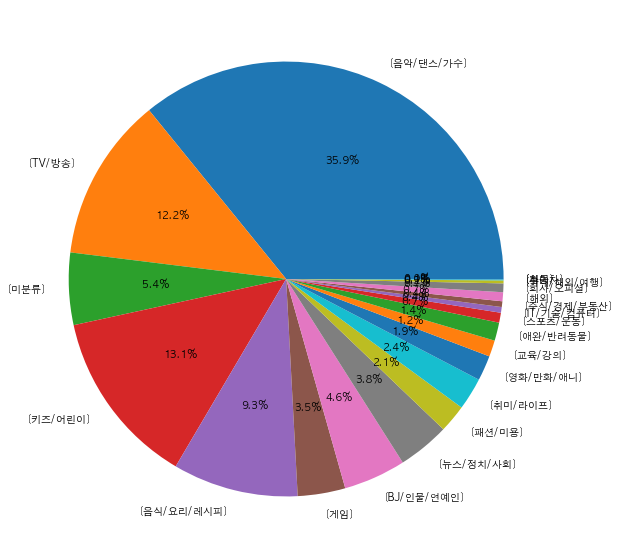

In [37]:
#카테고리별 구독자수 시각화하기
plt.figure(figsize = (30,10))
plt.pie(pivot_df['subscriber_sum'], labels=pivot_df.index, autopct='%1.1f%%')
plt.show()

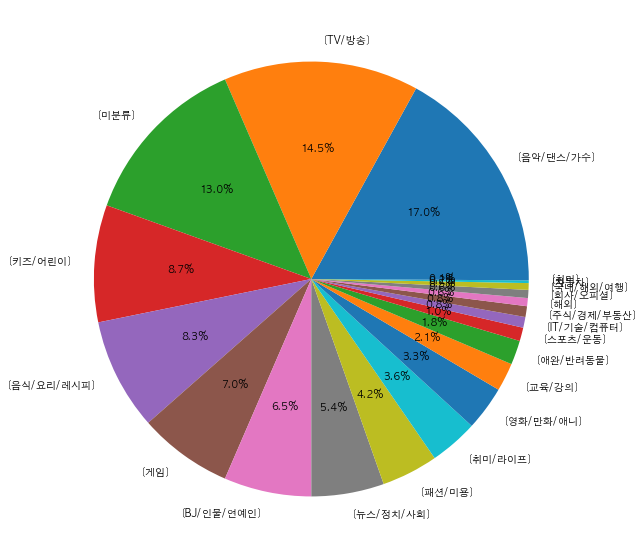

In [38]:
# 카테고리별 채널 수 시각화하기
pivot_df = pivot_df.sort_values(by='category_count', ascending=False)
pivot_df.head()
plt.figure(figsize = (30,10))
plt.pie(pivot_df['category_count'], labels=pivot_df.index, autopct='%1.1f%%')
plt.show()